In [29]:
!pip install pixellib
import pixellib
from pixellib.instance import instance_segmentation
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Download the mask rcnn model 
# !wget https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5 -O mask_rcnn_coco.h5
# path = ""

# Alternatively you can save the data to your Google Drive, and load the data from there
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/data/"


MessageError: ignored

In [ ]:
# Create the model object and load the trained model
model = instance_segmentation()
model.load_model(path + "mask_rcnn_coco.h5")

Instructions for updating:
Use fn_output_signature instead


In [ ]:
# # Load the image files to Google Colab
# from google.colab import files
# file = files.upload()

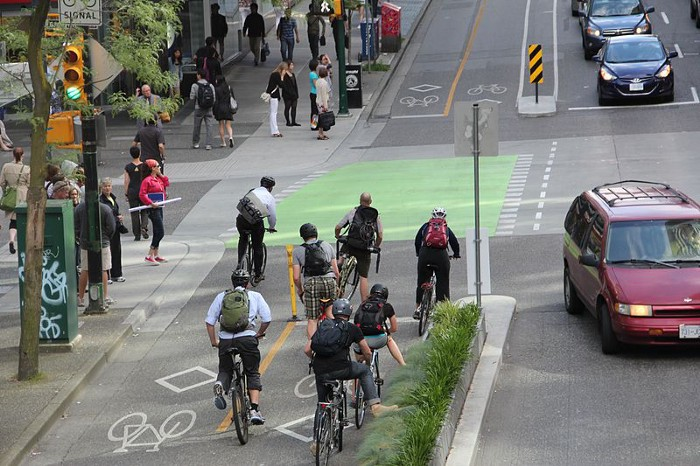

In [ ]:
input = path + "segment.jpg"
img = cv2.imread(input)
cv2_imshow(img)


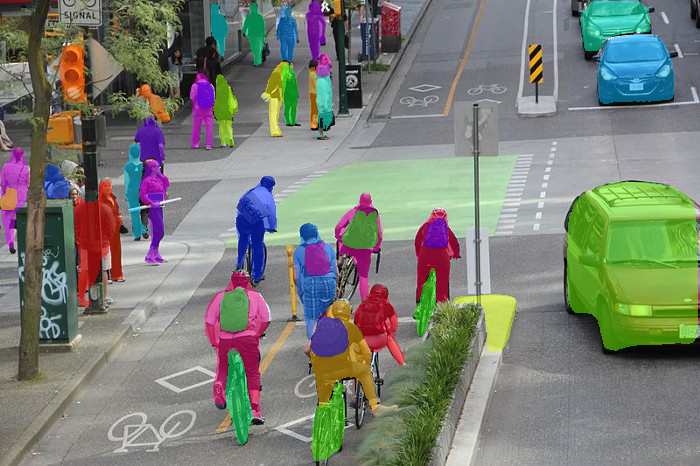

True

In [ ]:
segmask, output = model.segmentImage(input, show_bboxes= False)
# print(segmask)

cv2_imshow(output)


In [11]:
# Alternatively you can save the data to your Google Drive, and load the data from there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/image2"

In [ ]:
!ls path

ls: cannot access 'path': No such file or directory


In [12]:
!ls "/content/drive/MyDrive/image2"

b1.JPG	image_seg		  output4.jpg	   yolov3.txt
b2.JPG	Image_Segmentation.ipynb  Requirement.txt  yolov3.weights
b3.JPG	mask_rcnn_coco.h5	  yolov3.cfg


In [ ]:
# Create the model object and load the trained model
model = instance_segmentation()
model.load_model(path + "mask_rcnn_coco.h5")

Instructions for updating:
Use fn_output_signature instead


OSError: ignored

I shall use the actual address instead of path + "file name".

In [ ]:
# Create the model object and load the trained model
model = instance_segmentation()
model.load_model('/content/drive/MyDrive/image2/mask_rcnn_coco.h5')

The "path" set for the directory seems not to be respinding so i will only use actual address from this moment on.  

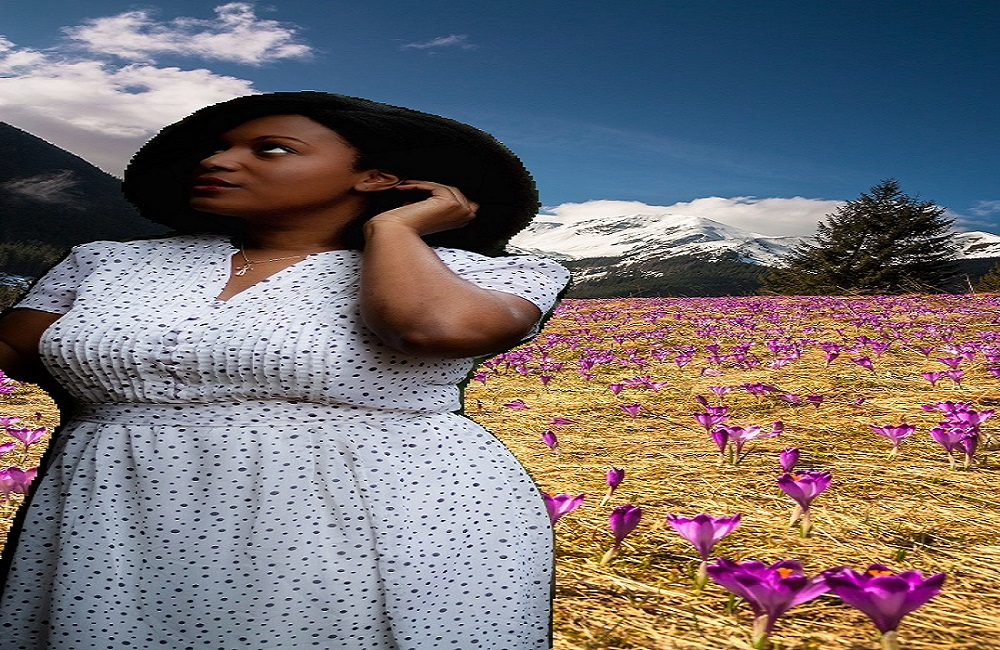

In [14]:
input = "/content/drive/MyDrive/image2/image_seg/bg_cover.jpg"
img = cv2.imread(input)
cv2_imshow(img)

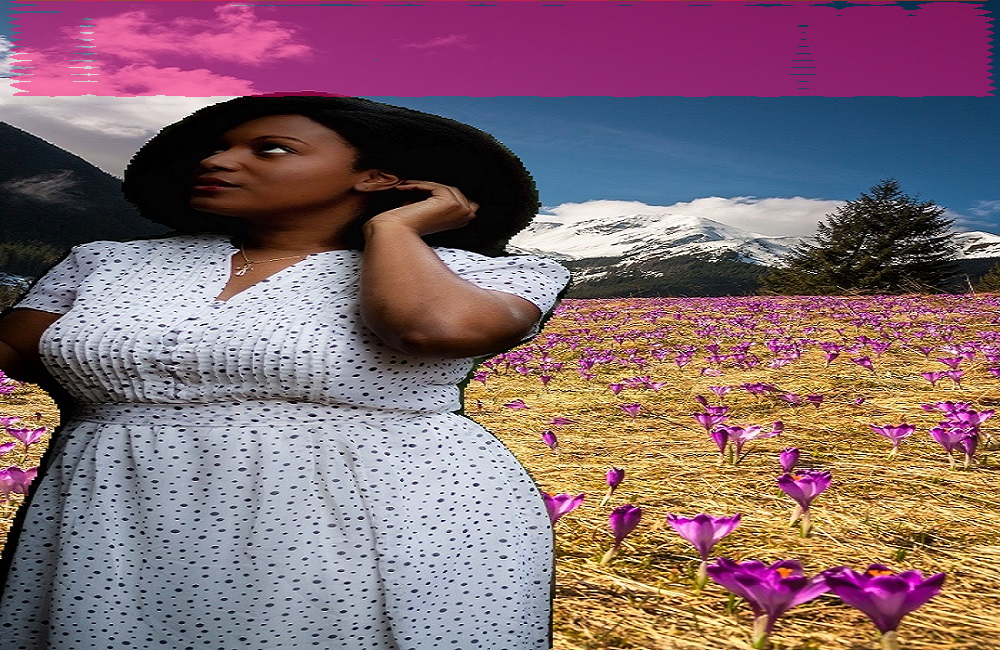

In [15]:
segmask, output = model.segmentImage(input, show_bboxes= False)
# print(segmask)

cv2_imshow(output)

Not getting the results I am looking for so I am trying another method using the same RCNN.

Processed image saved successfully in your current working directory.


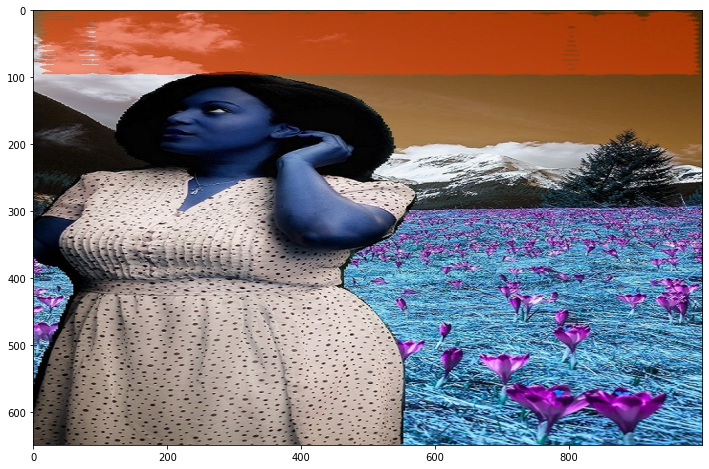

In [13]:
model.segmentImage("/content/drive/MyDrive/image2/image_seg/bg_cover.jpg", show_bboxes = False, output_image_name = "/content/drive/MyDrive/image2/output4.jpg")
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("/content/drive/MyDrive/image2/output4.jpg")
plt.figure(figsize=(12,8))
plt.imshow(img)

Finally after many many tries I got it.  Let us do another one.

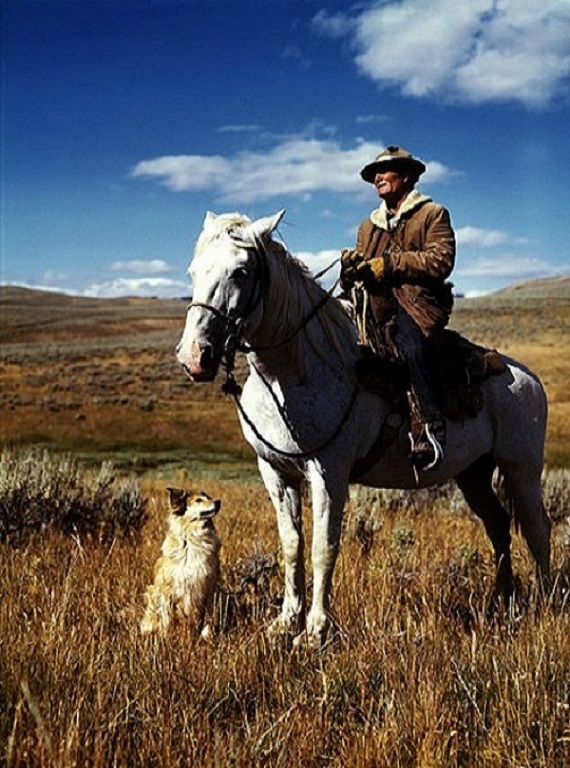

In [25]:
input = "/content/drive/MyDrive/image2/resize.jpg"
img = cv2.imread(input)
cv2_imshow(img)

Processed image saved successfully in your current working directory.


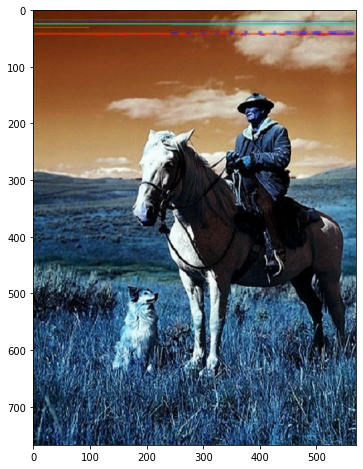

In [31]:
model.segmentImage("/content/drive/MyDrive/image2/resize.jpg", show_bboxes = False, output_image_name = "/content/drive/MyDrive/image2/output1.jpg")
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("/content/drive/MyDrive/image2/output1.jpg")
plt.figure(figsize=(12,8))
plt.imshow(img)

Processed image saved successfully in your current working directory.


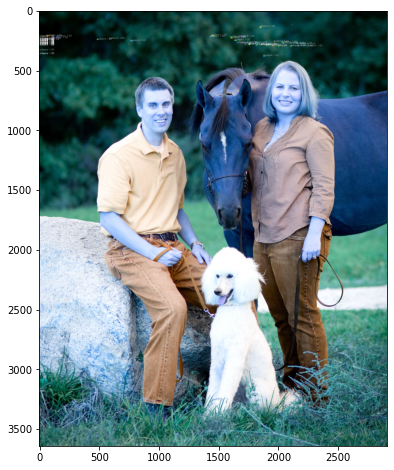

In [33]:
model.segmentImage("/content/drive/MyDrive/image2/resize2.jpg", show_bboxes = True, output_image_name = "/content/drive/MyDrive/image2/output5.jpg")
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("/content/drive/MyDrive/image2/output5.jpg")
plt.figure(figsize=(12,8))
plt.imshow(img)

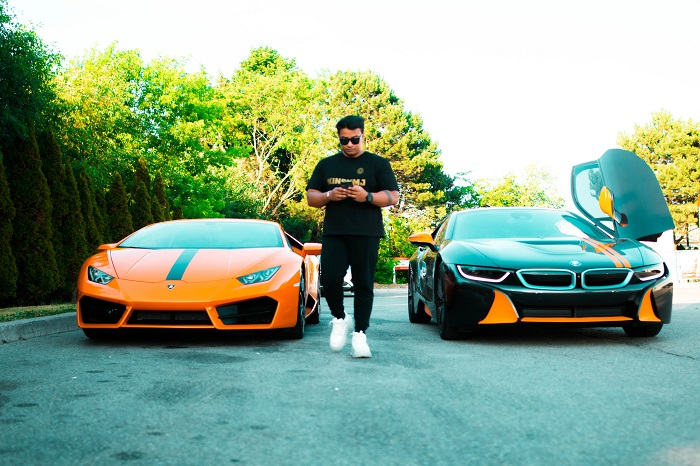

In [21]:
input = "/content/drive/MyDrive/image2/image_seg/image.jpg"
img = cv2.imread(input)
cv2_imshow(img)

Processed image saved successfully in your current working directory.


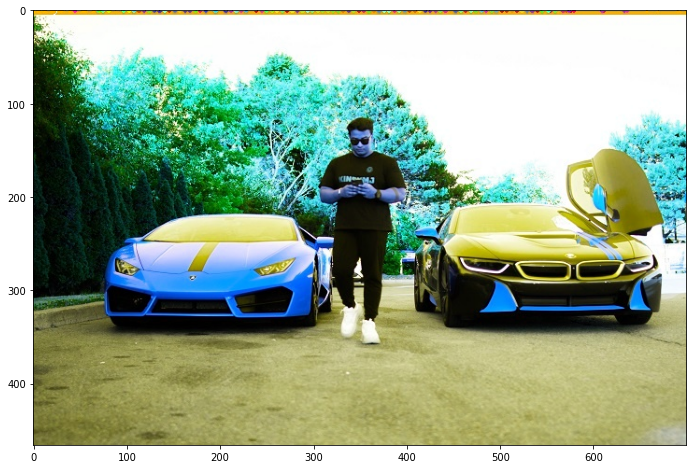

In [23]:
model.segmentImage("/content/drive/MyDrive/image2/image_seg/image.jpg", show_bboxes = True, output_image_name = "/content/drive/MyDrive/image2/output3.jpg")
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("/content/drive/MyDrive/image2/output3.jpg")
plt.figure(figsize=(12,8))
plt.imshow(img)

# Conclusion

From the various tests carried out above the filter has separated different features of an image into meaningful regions.  You can primarily use grayscale for automatic segmentation or other measurements taken from the image such as  
•	Colour – We can pbserve segmentation by pixel values.  From the knowledge of the distribution of the pixel a threshold pixel values is chosen that sit just between the objects.  If the objects is above(back ground object) or below(regarded as a foreground object) this threshold values it is separated.  
•	Texture – The variation of the texture on the image such as it identifying the sky.  This is done by getting a frequency threshold which we ca use to separate the images.  The forage transform, PCT and wavelength transform example of this methods
•	Segmentation by region – Take linear incremental walk until you reach some boundaries.  The image is separated based upon these boundaries, but these boundaries is made up of pixels. Hence, within a group, the filter could have easily distinguish different objects on the picture.   